<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Setting-up" data-toc-modified-id="Setting-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setting up</a></span></li><li><span><a href="#Rename-some-columns" data-toc-modified-id="Rename-some-columns-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Rename some columns</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#Unbalanced-RSE" data-toc-modified-id="Unbalanced-RSE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Unbalanced RSE</a></span><ul class="toc-item"><li><span><a href="#Gender-repartition-per-countries" data-toc-modified-id="Gender-repartition-per-countries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gender repartition per countries</a></span></li><li><span><a href="#Gender-repartition-in-academic-field" data-toc-modified-id="Gender-repartition-in-academic-field-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gender repartition in academic field</a></span><ul class="toc-item"><li><span><a href="#Setting-up" data-toc-modified-id="Setting-up-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Setting up</a></span></li></ul></li><li><span><a href="#Origin-of-RSEs" data-toc-modified-id="Origin-of-RSEs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Origin of RSEs</a></span><ul class="toc-item"><li><span><a href="#Data-from-HESA" data-toc-modified-id="Data-from-HESA-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Data from HESA</a></span></li><li><span><a href="#Which-field-for-which-gender" data-toc-modified-id="Which-field-for-which-gender-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Which field for which gender</a></span><ul class="toc-item"><li><span><a href="#STEM-versus-NON-STEM-field" data-toc-modified-id="STEM-versus-NON-STEM-field-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>STEM versus NON STEM field</a></span></li></ul></li></ul></li><li><span><a href="#Where-RSE-are-working" data-toc-modified-id="Where-RSE-are-working-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Where RSE are working</a></span></li><li><span><a href="#Years-of-software-development-between-gender" data-toc-modified-id="Years-of-software-development-between-gender-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Years of software development between gender</a></span><ul class="toc-item"><li><span><a href="#Setting-up" data-toc-modified-id="Setting-up-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Setting up</a></span></li><li><span><a href="#Number-of-year-of-software-development" data-toc-modified-id="Number-of-year-of-software-development-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Number of year of software development</a></span></li><li><span><a href="#Number-of-year-of-development-prior-to-RSE-job" data-toc-modified-id="Number-of-year-of-development-prior-to-RSE-job-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Number of year of development prior to RSE job</a></span></li><li><span><a href="#Checking-of-no-prior-dev-experience" data-toc-modified-id="Checking-of-no-prior-dev-experience-2.5.4"><span class="toc-item-num">2.5.4&nbsp;&nbsp;</span>Checking of no prior dev experience</a></span></li></ul></li><li><span><a href="#Evolution-of-the-proportion-of-women-hired-over-time" data-toc-modified-id="Evolution-of-the-proportion-of-women-hired-over-time-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Evolution of the proportion of women hired over time</a></span></li></ul></li></ul></div>

# Introduction

## Setting up

In [1]:
#%pwd  #look at the current work dir
#%cd   #change to the dir you want 

In [2]:
import itertools
import datetime
from dateutil.relativedelta import relativedelta
import string
import csv
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.interpolate import spline, splrep, splev, interp1d

In [3]:
import sys
from pathlib import Path
sys.path.append(str(Path('./../../').absolute().parent))
try:
    from include.likertScalePlot import likert_scale
    from include.likertScalePlot import wrap_label
    from include.textCleaning import plot_wordcloud as wordcloud
    from include.textCleaning import wrap_clean_text
except ModuleNotFoundError:
    sys.path.append(str(Path('./../../..').absolute().parent))
    from include.likertScalePlot import likert_scale
    from include.likertScalePlot import wrap_label

    from include.textCleaning import plot_wordcloud as wordcloud
    from include.textCleaning import wrap_clean_text

In [4]:
%%capture 
# Import notebook containing the imports the functions and the dataset
%run "../0. Imports and functions.ipynb"

# Import notebook containing sampled dataset
%run "../1. Overview and sampling.ipynb"

In [5]:
common_columns = ['Country', 'Year']

In [6]:
# Only taking the 2018 results
df = df[df['Year'] == 2018]

# Drop columns with only nan values 
df.dropna(how='all', axis=1, inplace=True)

# If want to rerun the analysis for one specific country
#country = 'United States'
#df = df[df['Country'] == country]

## Rename some columns

In [7]:
df.rename(columns={'satisGen1. In general, how satisfied are you with your current position':'Satisfaction current position', 
                   'satisGen2. In general, how satisfied are you with your career':'Satisfaction with career',
                   'rse4de. Does the majority of your role comprise leading a group of software developers or RSEs?': 'Leading RSE group'}, inplace=True)

## Functions

In [8]:
def chi2_test(leading_table):
    # Source: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
    stat, p, dof, expected = chi2_contingency(leading_table)
    print('stat= {}'.format(stat))
    print('dof=%d' % dof)
    print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [9]:
def boxplot(df, columns, by, title, ax=None):
    """"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,4), sharex=True, sharey=True)
        plt.suptitle(title, fontsize=20, color='grey')
    else:
        ax.set_title(title, fontsize=12, color='grey')
    women = df[df['Gender'] == 'Female'][columns].dropna()
    men = df[df['Gender'] == 'Male'][columns].dropna()
    axes = ax.boxplot([women, men], patch_artist=True, labels=['Women', 'Men'], 
                       showmeans=True, notch=True)
        
    colors = ['darkcyan', 'bisque']
    for patch, color in zip(axes['boxes'], colors):
        patch.set_color('grey')
        patch.set_facecolor(color)
        
    ## change color and linewidth of the medians
    for median in axes['medians']:
        median.set(color='darkgrey', linewidth=2)
        
    ## chage color and linewidth of the mean
    for mean in axes['means']:
        mean.set(color='purple')
        
    ## change color and linewidth of the whiskers
    for whisker in axes['whiskers']:
        whisker.set(color='grey', linewidth=1)

    ## change color and linewidth of the caps
    for cap in axes['caps']:
        cap.set(color='grey', linewidth=1)
                
    ax.tick_params(axis='y', colors='grey', labelsize=16)
    ax.tick_params(axis='x', colors='grey', labelsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    return ax

In [10]:
# Not used in the notebook
def divert_bar():
    field = gender_per_field.index
    women = gender_per_field['Percentage Women']
    man = gender_per_field['Percentage Men']

    idx = women.argsort()
    y = np.arange(len(field))

    fig, axes = plt.subplots(figsize=(20,12), ncols=2, sharey=True)
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
    axes[0].barh(y, women, align='center', color='darkcyan', zorder=10)
    axes[0].set(title='Women Percentage')
    axes[0].set_xlim(0, 100)
    axes[1].barh(y, man, align='center', color='bisque', zorder=10)
    axes[1].set(title='Men Percentage')
    axes[1].set_xlim(100, 0)

    axes[0].invert_xaxis()
    axes[1].invert_xaxis()

    axes[0].set(yticks=y, yticklabels=field)
    axes[0].yaxis.tick_left()
    axes[0].tick_params(axis='y', colors='grey', labelsize=16)

    for ax in axes.flat:
        ax.margins(0.0)
        ax.grid(False)   
    for ax in axes:
        ax.tick_params(axis='x', colors='grey', labelsize=16)
        rects = ax.patches         
    plt.show();

In [11]:
def plot_bar_gender(df, title, x_title, y_title, type_bar='barh', name_save=None, n_values=None):
    
    ## Plotting percentage of gender per country
    height = 1*len(df)
    fig_size = (25, height)
    #fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw = {'width_ratios': [25,1]}, figsize=fig_size)
    #ax = axs[0]
    ax = df.plot(kind=type_bar, stacked=True, width=1, edgecolor='white', color=['darkcyan', 'bisque'], figsize=fig_size,
                legend=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.suptitle(title, fontsize=20, color='grey')
    if name_save is None:
        name_save = x_title
    if type_bar == 'barh':
        x_title, y_title = y_title, x_title

    ax.set_ylabel(y_title, fontsize=18, color='grey')
    ax.tick_params(axis='y', colors='grey', labelsize=16)
    ax.set_xlabel(x_title, fontsize=18, color='grey')
    ax.tick_params(axis='x', colors='grey', labelsize=16)
    wrapped_labels = [wrap_label(item.get_text()) for item in ax.get_yticklabels()]
    ax.set_yticklabels(wrapped_labels)
    #ax.legend(bbox_to_anchor=(1., 0.5), fontsize=14, loc='center left',ncol=1, fancybox=True, shadow=True)
    if type_bar == 'barh':
        ax.invert_yaxis()
    rects = ax.patches
    # For each bar: Place a label
    for rect in rects:
        vspace=0
        hspace=0
        va = 'top'
        ha='right'
        if type_bar == 'barh':
            rect_position = rect.get_x()  # If it return 0 it is the first bar, if it return >0 it is the second bar
            va='center'                   
            x_value = rect.get_width()    
            y_value = rect.get_y() + rect.get_height() /2
            label = "{:.0f}%".format(x_value)

            if rect_position == 0 and x_value < 100:  # FIXME: going to break if the first x (women) is == 100
                label_color = 'white'                 # Possible to access the color information with rect(color=)
                hspace = -5                           # But need to rewrite that function to patch the rectangle with the color
            else:                                     # rather than having them drawn with the df.plot() function 
                label_color = 'grey'
                x_value = 95
        else:
            rect_position = rect.get_y()  # If it return 0 it is the first bar, if it return >0 it is the second bar

            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2
            label = "{:.0f}%".format(y_value)
            if rect_position == 0 and y_value < 100:  # FIXME: going to break if the first y(women) is == 100
                # Number of points between bar and label
                # Invert space to place label below
                vspace = -5
                ha='center'
                label_color='white'
            else:
                ha='center'
                y_value = 90
                label_color='grey'
        # Create annotation
        ax.annotate(label,                       # Use `label` as label
                    (x_value, y_value),          # Place label at end of the bar
                    xytext=(hspace, vspace),     # Vertically shift label by `space`
                    textcoords="offset points",   # Interpret `xytext` as offset in points
                    ha=ha,                       # Horizontally center label
                    va=va,                       # Vertically align label differently for
                    color=label_color, fontsize=16)                     
                                            


    handles, labels = ax.get_legend_handles_labels()
    labels = ['Women','Men']
    
    # Add text about the n_value
    if n_values is not None:
        for i, string in enumerate(n_values):    
            plt.text(x=101, y=i, s='n={}'.format(int(string)), fontsize=14, color='grey')

    plt.legend(handles, labels, bbox_to_anchor=(0., 0.95, 1., .10), loc=5,
               ncol=2,  borderaxespad=0.,  fancybox=True)
    #plt.subplots_adjust(wspace=0.0)

    plt.tight_layout()
    # Adjust the position of the title only for small charts
    if len(df) >4 :
        plt.subplots_adjust(top=0.95)
    
    plt.margins(x=0, y=0)
    plt.savefig('./gender_difference/plots/gender_per_{}_perc.png'.format(name_save), bbox_inches ='tight')
    return plt

In [12]:
def plot_bar(df, title, x_title, y_title, type_bar='barh', name_save=None, n_values=None):
    
    ## Plotting percentage of gender per country
    height = 1.1*len(df)
    fig_size = (25, height)
    #fig, axs = plt.subplots(1, 2, sharey=True, gridspec_kw = {'width_ratios': [25,1]}, figsize=fig_size)
    #ax = axs[0]
    ax = df.plot(kind=type_bar, stacked=True, width=1, edgecolor='white', figsize=fig_size,
                legend=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    if name_save is None:
        name_save = x_title
    if type_bar == 'barh':
        x_title, y_title = y_title, x_title

    ax.set_ylabel(y_title, fontsize=18, color='grey')
    ax.tick_params(axis='y', colors='grey', labelsize=16)
    ax.set_xlabel(x_title, fontsize=18, color='grey')
    ax.tick_params(axis='x', colors='grey', labelsize=16)
    wrapped_labels = [wrap_label(item.get_text()) for item in ax.get_yticklabels()]
    ax.set_yticklabels(wrapped_labels)
    #ax.legend(bbox_to_anchor=(1., 0.5), fontsize=14, loc='center left',ncol=1, fancybox=True, shadow=True)
    if type_bar == 'barh':
        ax.invert_yaxis()
    rects = ax.patches
    # For each bar: Place a label
    for rect in rects:
        vspace=0
        hspace=0
        va = 'top'
        ha='right'
        if type_bar == 'barh':
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() /2
            label = "{:.0f}%".format(x_value)
            va='center'
            label_color = 'white'
        else:
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2
            label = "{:.0f}%".format(y_value)

            ha='center'
            y_value = 90
            label_color='grey'
        # Create annotation
        if (x_value < 1 and type_bar == 'barh'): # or (y_value < 1 and type_bar == 'bar'):
            label_color = 'grey'
            label = '<1%'
            x_value = 2.5
            
        ax.annotate(label,                       # Use `label` as label
                        (x_value, y_value),          # Place label at end of the bar
                        xytext=(hspace, vspace),     # Vertically shift label by `space`
                        textcoords="offset points",   # Interpret `xytext` as offset in points
                        ha=ha,                       # Horizontally center label
                        va=va,                       # Vertically align label differently for
                        color=label_color, fontsize=18)                     
                                            


    handles, labels = ax.get_legend_handles_labels()
    
    # Add text about the n_value
    if n_values is not None:
        y_values = [rect.get_y() for rect in rects]
        x_values = [rect.get_x() for rect in rects]
        for i, string in enumerate(n_values):
            
            plt.text(x=37, y=i+0.1, s='n={}'.format(int(string)), fontsize=14, color='grey')

    plt.legend(handles, labels, bbox_to_anchor=(0., 0.95, 1., .10), loc=5,
               ncol=2,  borderaxespad=0.,  fancybox=True)
    #plt.subplots_adjust(wspace=0.0)
    plt.margins(x=0, y=0)
    fig.tight_layout()
    # Adjust the position of the title only for small charts
    plt.subplots_adjust(top=0.95)
    plt.suptitle(title, fontsize=20, color='grey')

    plt.savefig('./gender_difference/plots/{}_perc.png'.format(name_save), bbox_inches ='tight')
    return plt

# Unbalanced RSE

## Gender repartition per countries

In [13]:
# rename the column for readiblity
df.rename(columns={"socio2. Please select your gender": "Gender"}, inplace=True)

In [14]:
# Getting the count of the gender per countries
gender_per_country = df.groupby('Country')["Gender"].value_counts().to_frame()
gender_per_country.columns = ['Count']
gender_per_country = gender_per_country.reset_index()
gender_per_country = gender_per_country.pivot(values='Count', index='Country', columns='Gender')
gender_per_country.loc['Total'] = gender_per_country.sum(axis=0)
gender_per_country.replace({np.nan: -1}, inplace=True)
gender_per_country = gender_per_country.astype(int)
gender_per_country.replace({-1: np.nan}, inplace=True)
#gender_per_country = gender_per_country.astype(str)
gender_per_country
gender_per_country.to_csv('./gender_difference/data/gender_per_country.csv', index=True)

Gender,Female,Male,Other,Prefer not to say
Country,,,,
Australia,12.0,69.0,NaN,3.0
Germany,27.0,243.0,NaN,11.0
Netherlands,4.0,43.0,NaN,2.0
New Zealand,3.0,31.0,NaN,NaN
South Africa,2.0,17.0,NaN,NaN
United Kingdom,29.0,162.0,1.0,11.0
United States,29.0,98.0,3.0,4.0
World,3.0,37.0,NaN,NaN
Total,109.0,700.0,4.0,31.0


In [15]:
# Dropping `Prefer not to say` and `Other` for the percentage
gender_per_country.drop(['Prefer not to say', 'Other'], axis=1, inplace=True)
# Dropping `Prefer not to say` and `Other` for further analysis
df = df[(df['Gender'] == 'Male') | (df['Gender'] == 'Female')]

In [16]:
gender_per_country_perc = gender_per_country.apply(lambda x: x/x.sum()*100, axis=1)
gender_per_country_perc
gender_per_country_perc.to_csv('./gender_difference/data/gender_per_country_perc.csv', index=True)
# Getting the n_values for each cat
n_values_country = gender_per_country[['Female', 'Male']].sum(axis=1)

Gender,Female,Male
Country,,
Australia,14.814815,85.185185
Germany,10.000000,90.000000
Netherlands,8.510638,91.489362
New Zealand,8.823529,91.176471
South Africa,10.526316,89.473684
United Kingdom,15.183246,84.816754
United States,22.834646,77.165354
World,7.500000,92.500000
Total,13.473424,86.526576


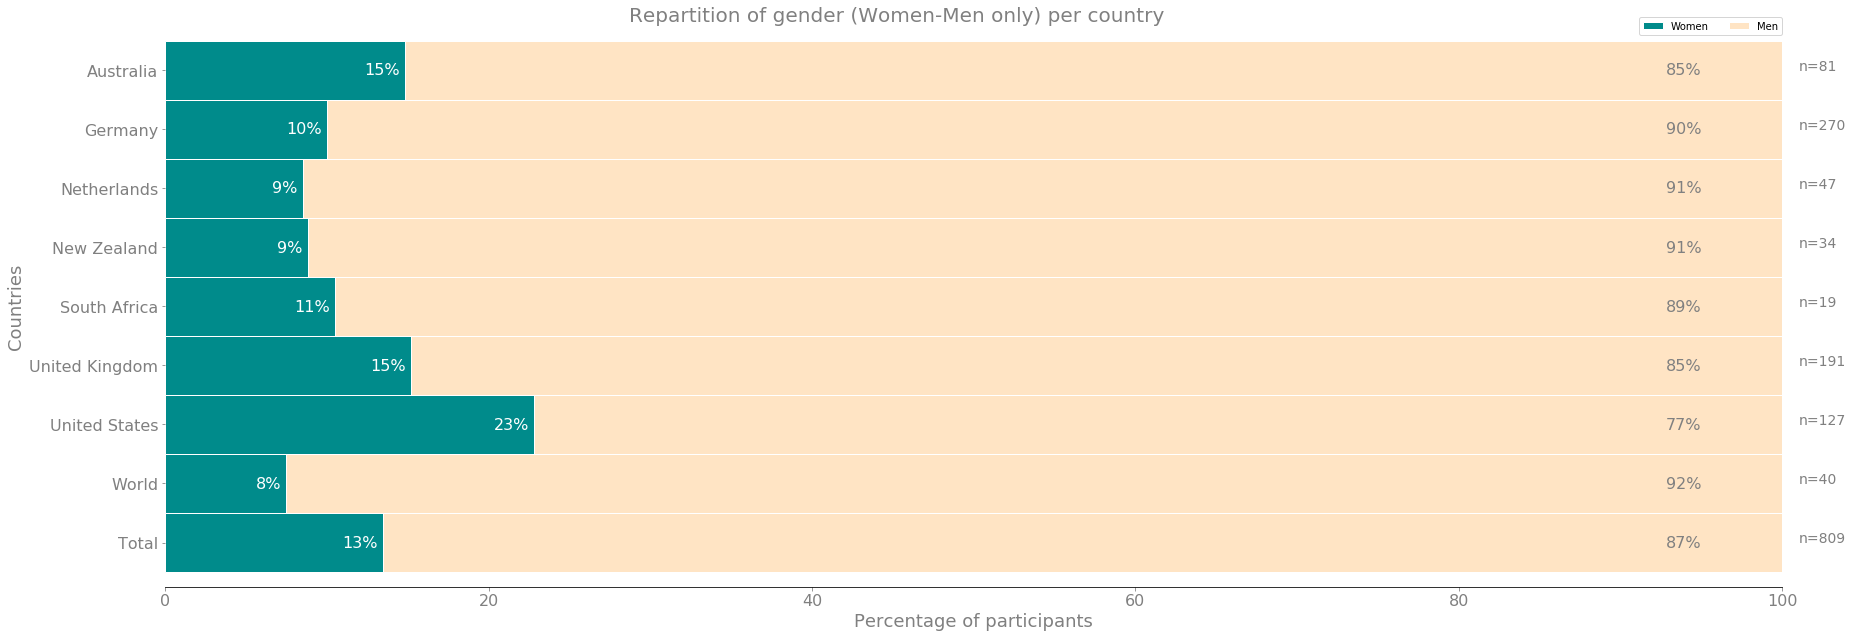

In [17]:
plot_bar_gender(gender_per_country_perc, 
                title='Repartition of gender (Women-Men only) per country', 
                x_title = 'Countries', y_title = 'Percentage of participants', 
                n_values=n_values_country );

## Gender repartition in academic field

### Setting up

In [18]:
## Replace the value of the different field with the JACS level 1 field. This information is found in a created file where the different
## fields used in the survey are match with the corresponding JACS level.

# Create the dictionary with the matching values

# Dictionary used to replace value for survey data
replace_aca_field = dict()

# Dictionary used to replace value for HESA data
hesa_level = dict()

# loop through the file to create the dictionaries
with open ('../data/external_data/aca_field_to_jacs.csv', ) as f:
    reader = csv.DictReader(f, delimiter=';')
    # Create the hesa levels
    for row in reader:
        level2 = row['level2']
        level3 = row['level3']
        if level2 == '':  # Means the right value is stored in level3 because identical to the higher level
            level2 = level3
        hesa_level.setdefault(row['level1'], {}).setdefault('level2', set()).add(level2)
        hesa_level.setdefault(row['level1'], {}).setdefault('level3', set()).add(level3)
        
        for col in ['uk1', 'uk2', 'aus1', 'aus2']:
            if row[col] != '':
                replace_aca_field.setdefault(row[col], []).append(row['level1'])
                
# Create the dictionary to relace with the appropriate formating
dict_to_replace = {k: '{}'.format(replace_aca_field[k][0]) for k in replace_aca_field}

In [19]:
# Replace the values with the dictionary created and output in a new column
df['Field of education'] = df['edu2. In which discipline is your highest academic qualification?'].replace(dict_to_replace)

# Drop the now obsolete column
df.drop('edu2. In which discipline is your highest academic qualification?', axis=1, inplace=True)

In [20]:
## Replacing the field for the working field too. The question being multichoice, the field is contained in the columns' names, beetween square brackets
## It rename these columns and merge them together (as after renaming, it will have several columns with the same name), then drop the previous columns

current_field = [x for x in df.columns if x[:len('currentEmp13')] == 'currentEmp13']
set_new_current = set()

for col in current_field:
    field = col.split('[')[-1][:-1]
    if field in dict_to_replace:
        replace_col = 'Working in ' + '[{}]'.format(dict_to_replace[field])

        if replace_col in df.columns:
            df[replace_col] = df[replace_col].combine_first(df[col])
            try:
                df.drop(col, inplace=True, axis=1)
            except KeyError:
                print('Could not remove: {}'.format(col))
        else:
            df.rename(columns={col: replace_col}, inplace=True)
        set_new_current.add(replace_col)

        ## Regenerate the list of columns with the new name
current_field = [x for x in set_new_current]
df[current_field] = df[current_field].replace('No', np.nan)#.replace('Yes', int(1))
df[current_field] = df[current_field].replace('Yes', 1)

## Origin of RSEs

In [21]:
repartition_field = df['Field of education'].value_counts().to_frame()#.plot(kind='bar')
repartition_field_perc = repartition_field.apply(lambda x: x/x.sum()*100, axis=0)
repartition_field
n_values_repartition = repartition_field['Field of education']
repartition_field.to_csv('./gender_difference/data/repartition_per_fields.csv', index=True)

,Field of education
Physical sciences,294
Computer science,198
Biological sciences,99
Engineering,85
Mathematics,62
Historical & philosophical studies,16
Social studies,9
Business & administrative studies,8
Technologies,8
Mass communications & documentation,6


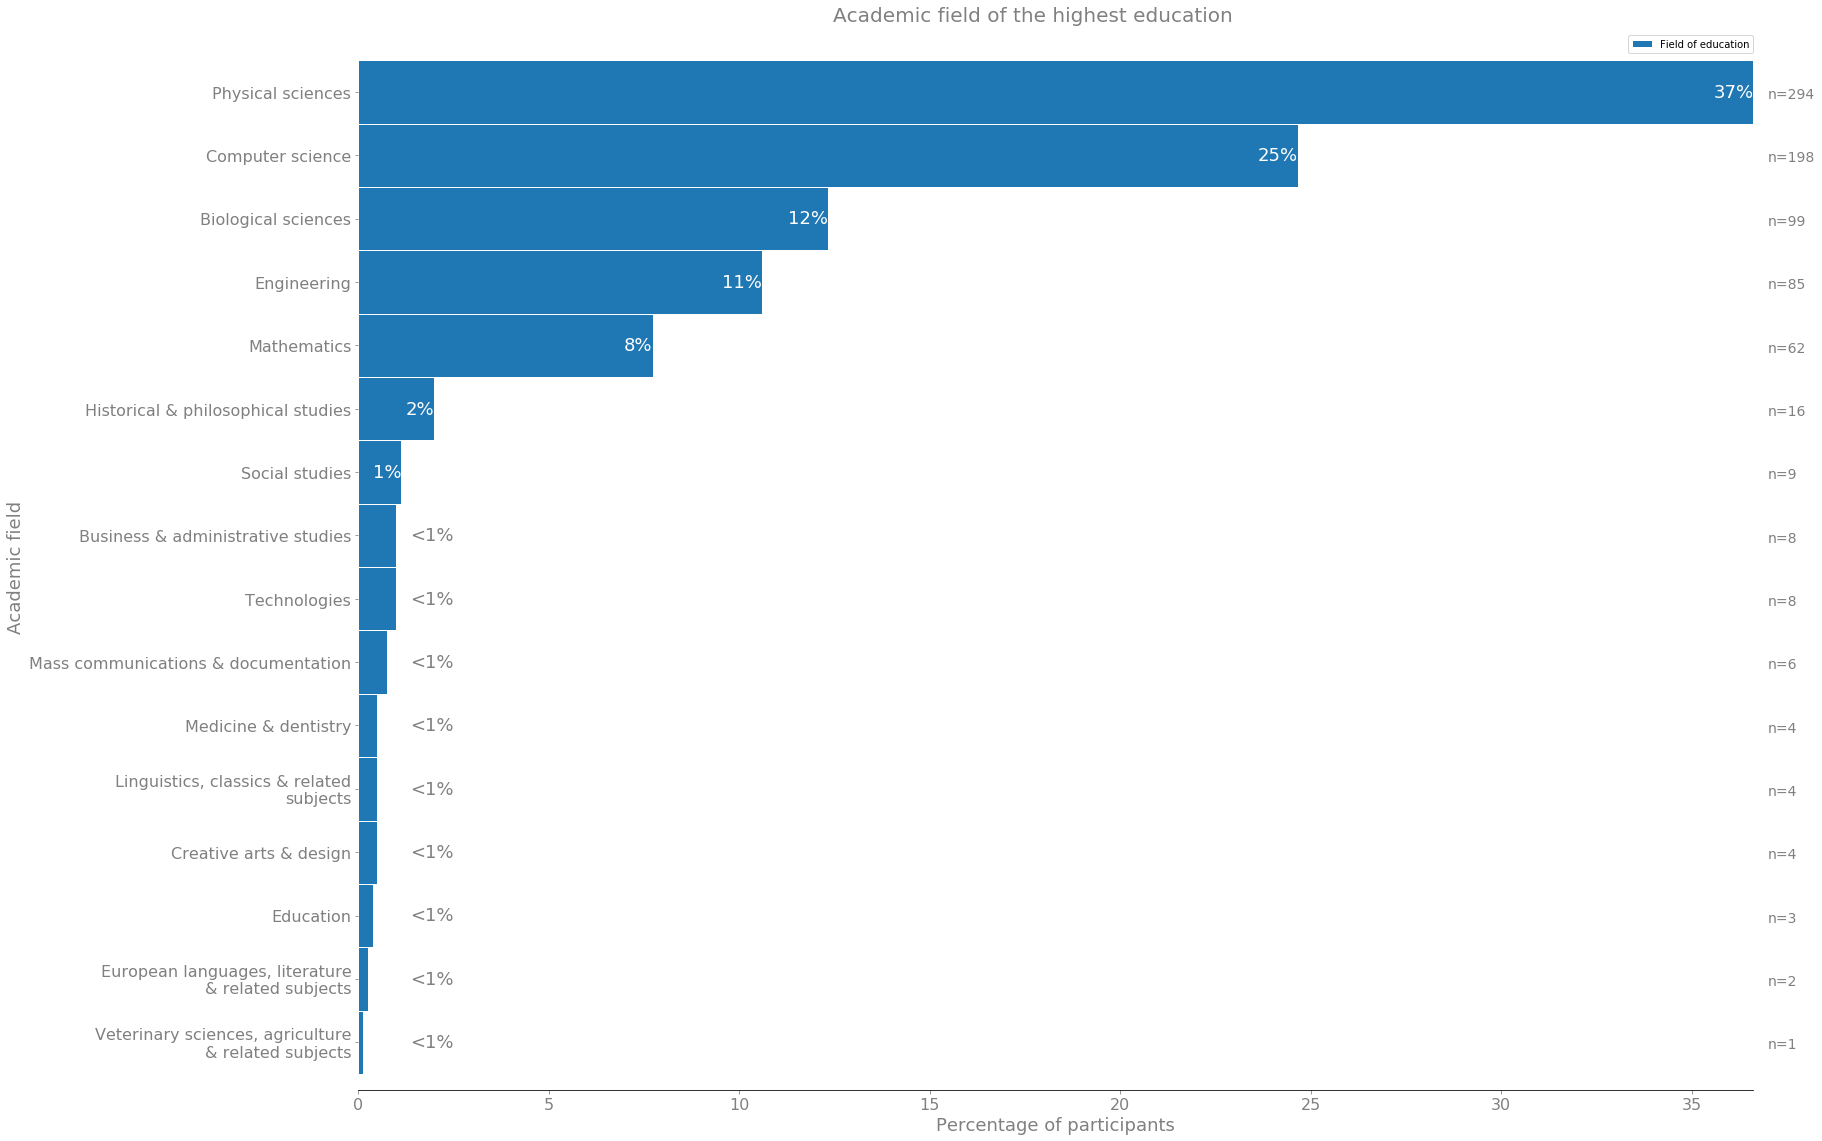

In [22]:
plot_bar(repartition_field_perc, 
         title='Academic field of the highest education', 
         x_title = 'Academic field', y_title = 'Percentage of participants', 
         name_save='repartition_fields', type_bar='barh', n_values=n_values_repartition);

### Data from HESA 

In [23]:
hesa_field_gender = pd.read_csv('./gender_difference/data/hesa_gender_field_2018.csv', delimiter=';')
# Relace the Cost centre, which is equal to level2 HESA, with the level
#hesa_field_gender['Level1'] = hesa_field_gender['Cost centre'] 

In [24]:
## Filtering out only the fields that are present in the RSE data to avoid unnecessary information
#hesa_field_gender = hesa_field_gender[hesa_field_gender['Cost centre group'].isin(current_field)]

In [25]:
number_per_field = hesa_field_gender[['Cost centre group','Sex', 'Number']].groupby(['Cost centre group', 'Sex']).sum().reset_index().pivot(values='Number', index='Cost centre group', columns='Sex')

In [26]:
perc_per_field_hesa_perc = number_per_field.apply(lambda x: x/x.sum()*100, axis=1)
n_values_hesa = number_per_field[['Female', 'Male']].sum(axis=1)
perc_per_field_hesa_perc
#perc_per_field_hesa.sort_values(by='Female', inplace=True, ascending=True)

Sex,Female,Male
Cost centre group,,
Academic services,57.641921,42.358079
Administrative & business studies,43.721906,56.278094
"Agriculture, forestry & veterinary science",52.895753,47.104247
Architecture & planning,34.710744,65.289256
"Biological, mathematical & physical sciences",34.750800,65.249200
"Design, creative & performing arts",47.767100,52.232900
Education,60.215467,39.784533
Engineering & technology,20.362514,79.637486
Humanities & language based studies & archaeology,53.126729,46.873271


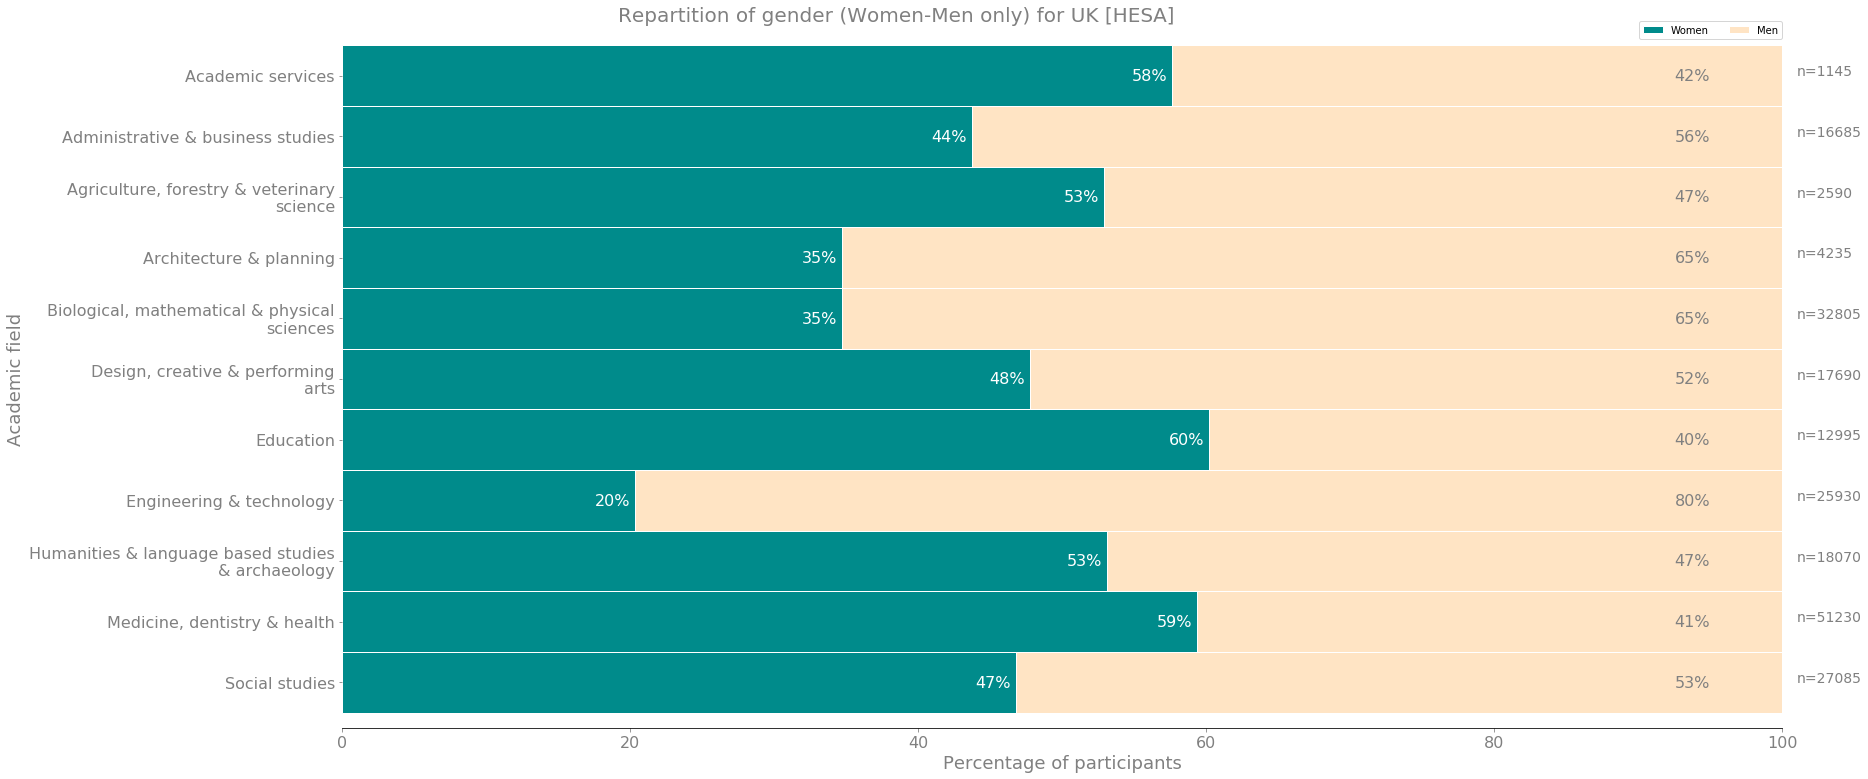

In [27]:
plot_bar_gender(perc_per_field_hesa_perc, title='Repartition of gender (Women-Men only) for UK [HESA]', x_title = 'Academic field', y_title = 'Percentage of participants', name_save='field_hesa', n_values=n_values_hesa);

### Which field for which gender

In [28]:
gender_per_field = df.groupby('Gender')['Field of education'].value_counts().to_frame()
# Getting the count of the gender per countries
#gender_per_country = df.groupby('Country')["Gender"].value_counts().to_frame()
gender_per_field.columns = ['Count']
gender_per_field = gender_per_field.reset_index()
gender_per_field = gender_per_field.pivot(values='Count', index='Field of education', columns='Gender')
#gender_per_country.loc['Total'] = gender_per_country.sum(axis=0)
#gender_per_country.replace({np.nan: -1}, inplace=True)
#gender_per_country = gender_per_country.astype(int)
#gender_per_country.replace({-1: np.nan}, inplace=True)
gender_per_field

Gender,Female,Male
Field of education,,
Biological sciences,14.0,85.0
Business & administrative studies,1.0,7.0
Computer science,23.0,175.0
Creative arts & design,NaN,4.0
Education,NaN,3.0
Engineering,4.0,81.0
"European languages, literature & related subjects",NaN,2.0
Historical & philosophical studies,6.0,10.0
"Linguistics, classics & related subjects",NaN,4.0


In [29]:
gender_per_field_perc = gender_per_field.apply(lambda x: x/x.sum()*100, axis=1)
gender_per_field_perc
n_values_field = gender_per_field[['Female', 'Male']].sum(axis=1)
gender_per_field_perc.to_csv('./gender_difference/data/gender_per_country_perc.csv', index=True)

Gender,Female,Male
Field of education,,
Biological sciences,14.141414,85.858586
Business & administrative studies,12.500000,87.500000
Computer science,11.616162,88.383838
Creative arts & design,NaN,100.000000
Education,NaN,100.000000
Engineering,4.705882,95.294118
"European languages, literature & related subjects",NaN,100.000000
Historical & philosophical studies,37.500000,62.500000
"Linguistics, classics & related subjects",NaN,100.000000


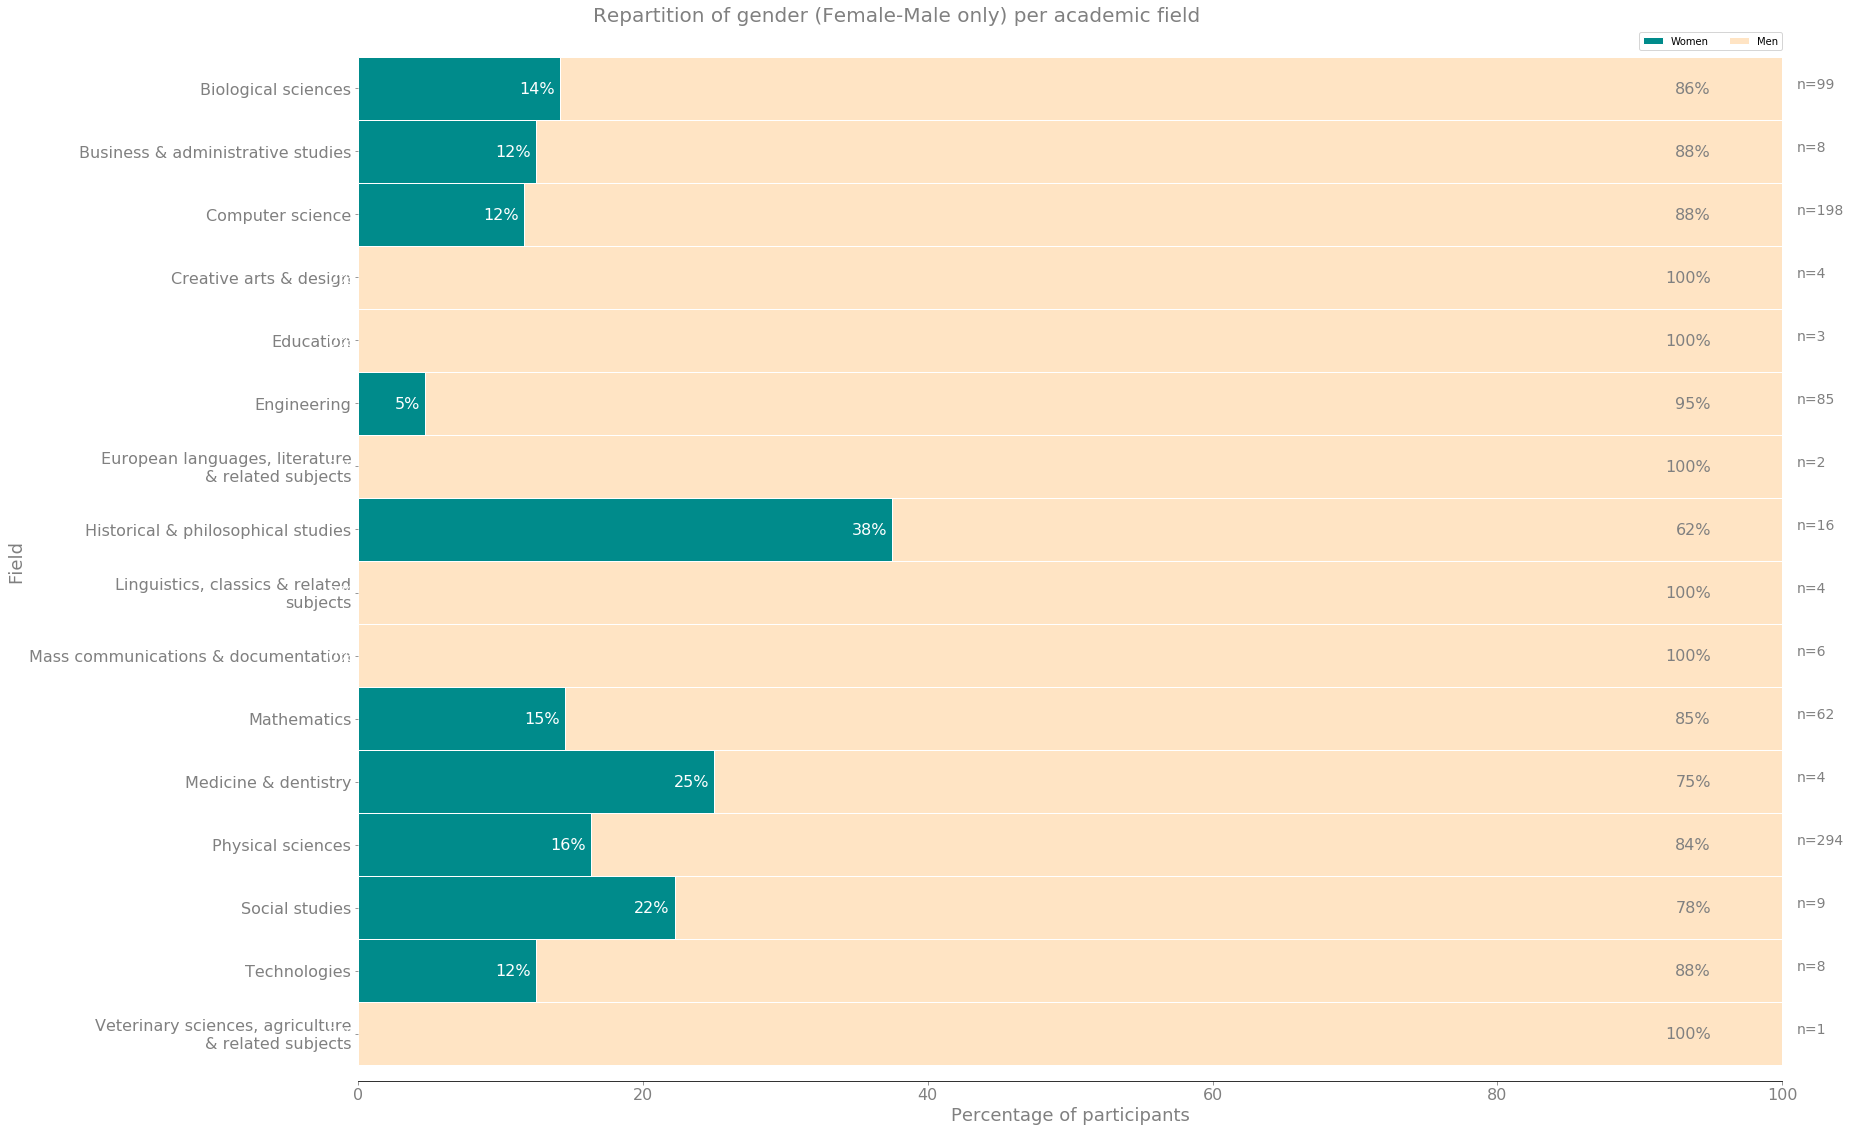

In [30]:
plot_bar_gender(gender_per_field_perc, title='Repartition of gender (Female-Male only) per academic field', x_title = 'Field', y_title = 'Percentage of participants', n_values=n_values_field );

#### STEM versus NON STEM field

In [31]:
# Create the Stem field not stem field
stem_fields = ['Physical sciences', 'Computer science', 'Biological sciences', 'Engineering', 'Mathematics']
df['STEM_field'] = np.where(df['Field of education'].isin(stem_fields), 'Yes', 'No')

In [32]:
stem_vs_not = df.groupby('Gender')['STEM_field'].value_counts().to_frame()
stem_vs_not.columns = ['Count']
stem_vs_not = stem_vs_not.reset_index()
stem_vs_not = stem_vs_not.pivot(values='Count', index='STEM_field', columns='Gender')
# Reverse only to get the 'Yes' at the top
stem_vs_not = stem_vs_not.iloc[::-1]
stem_vs_not

Gender,Female,Male
STEM_field,,
Yes,98,640
No,11,60


In [33]:
stem_vs_not_perc = stem_vs_not.apply(lambda x: x/x.sum()*100, axis=1)
stem_vs_not_perc
n_values_stem = stem_vs_not[['Female', 'Male']].sum(axis=1)
stem_vs_not_perc.to_csv('./gender_difference/data/gender_stem_vs_not_perc.csv', index=True)

Gender,Female,Male
STEM_field,,
Yes,13.279133,86.720867
No,15.492958,84.507042


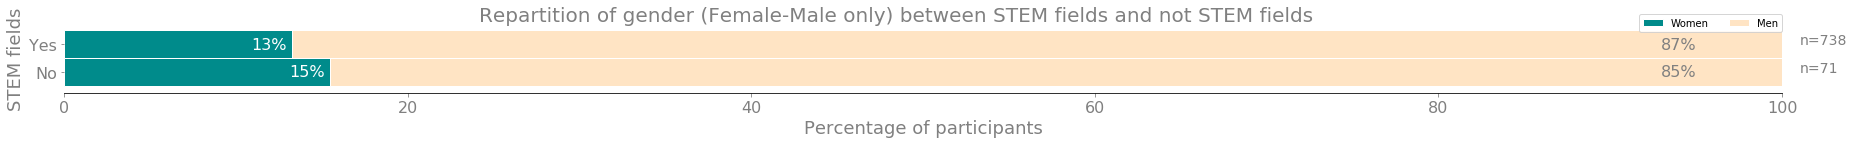

In [34]:
plot_bar_gender(stem_vs_not_perc, title='Repartition of gender (Female-Male only) between STEM fields and not STEM fields', x_title = 'STEM fields', y_title = 'Percentage of participants', name_save='stem_vs_not', n_values=n_values_stem);

## Where RSE are working 

In [35]:
gender_per_working_field = df.groupby('Gender')[current_field].agg('sum')#
gender_per_working_field.columns =[x.split('[')[-1][:-1] for x in gender_per_working_field.columns]
gender_per_working_field= gender_per_working_field.transpose()
#gender_per_working_field.sort_values(by='Percentage Women', inplace=True, ascending=True)
gender_per_working_field

Gender,Female,Male
Medicine & dentistry,6.0,22.0
Creative arts & design,2.0,14.0
Business & administrative studies,3.0,8.0
"European languages, literature & related subjects",1.0,5.0
Physical sciences,10.0,75.0
Law,1.0,8.0
"Veterinary sciences, agriculture & related subjects",8.0,27.0
Engineering,5.0,45.0
Technologies,7.0,56.0
Biological sciences,25.0,175.0


In [36]:
gender_per_working_field_perc = gender_per_working_field.apply(lambda x: x/x.sum()*100, axis=1)
gender_per_working_field_perc
n_values_working = gender_per_working_field[['Female', 'Male']].sum(axis=1)
gender_per_working_field_perc.to_csv('./gender_difference/data/gender_per_working_field.csv', index=True)

Gender,Female,Male
Medicine & dentistry,21.428571,78.571429
Creative arts & design,12.500000,87.500000
Business & administrative studies,27.272727,72.727273
"European languages, literature & related subjects",16.666667,83.333333
Physical sciences,11.764706,88.235294
Law,11.111111,88.888889
"Veterinary sciences, agriculture & related subjects",22.857143,77.142857
Engineering,10.000000,90.000000
Technologies,11.111111,88.888889
Biological sciences,12.500000,87.500000


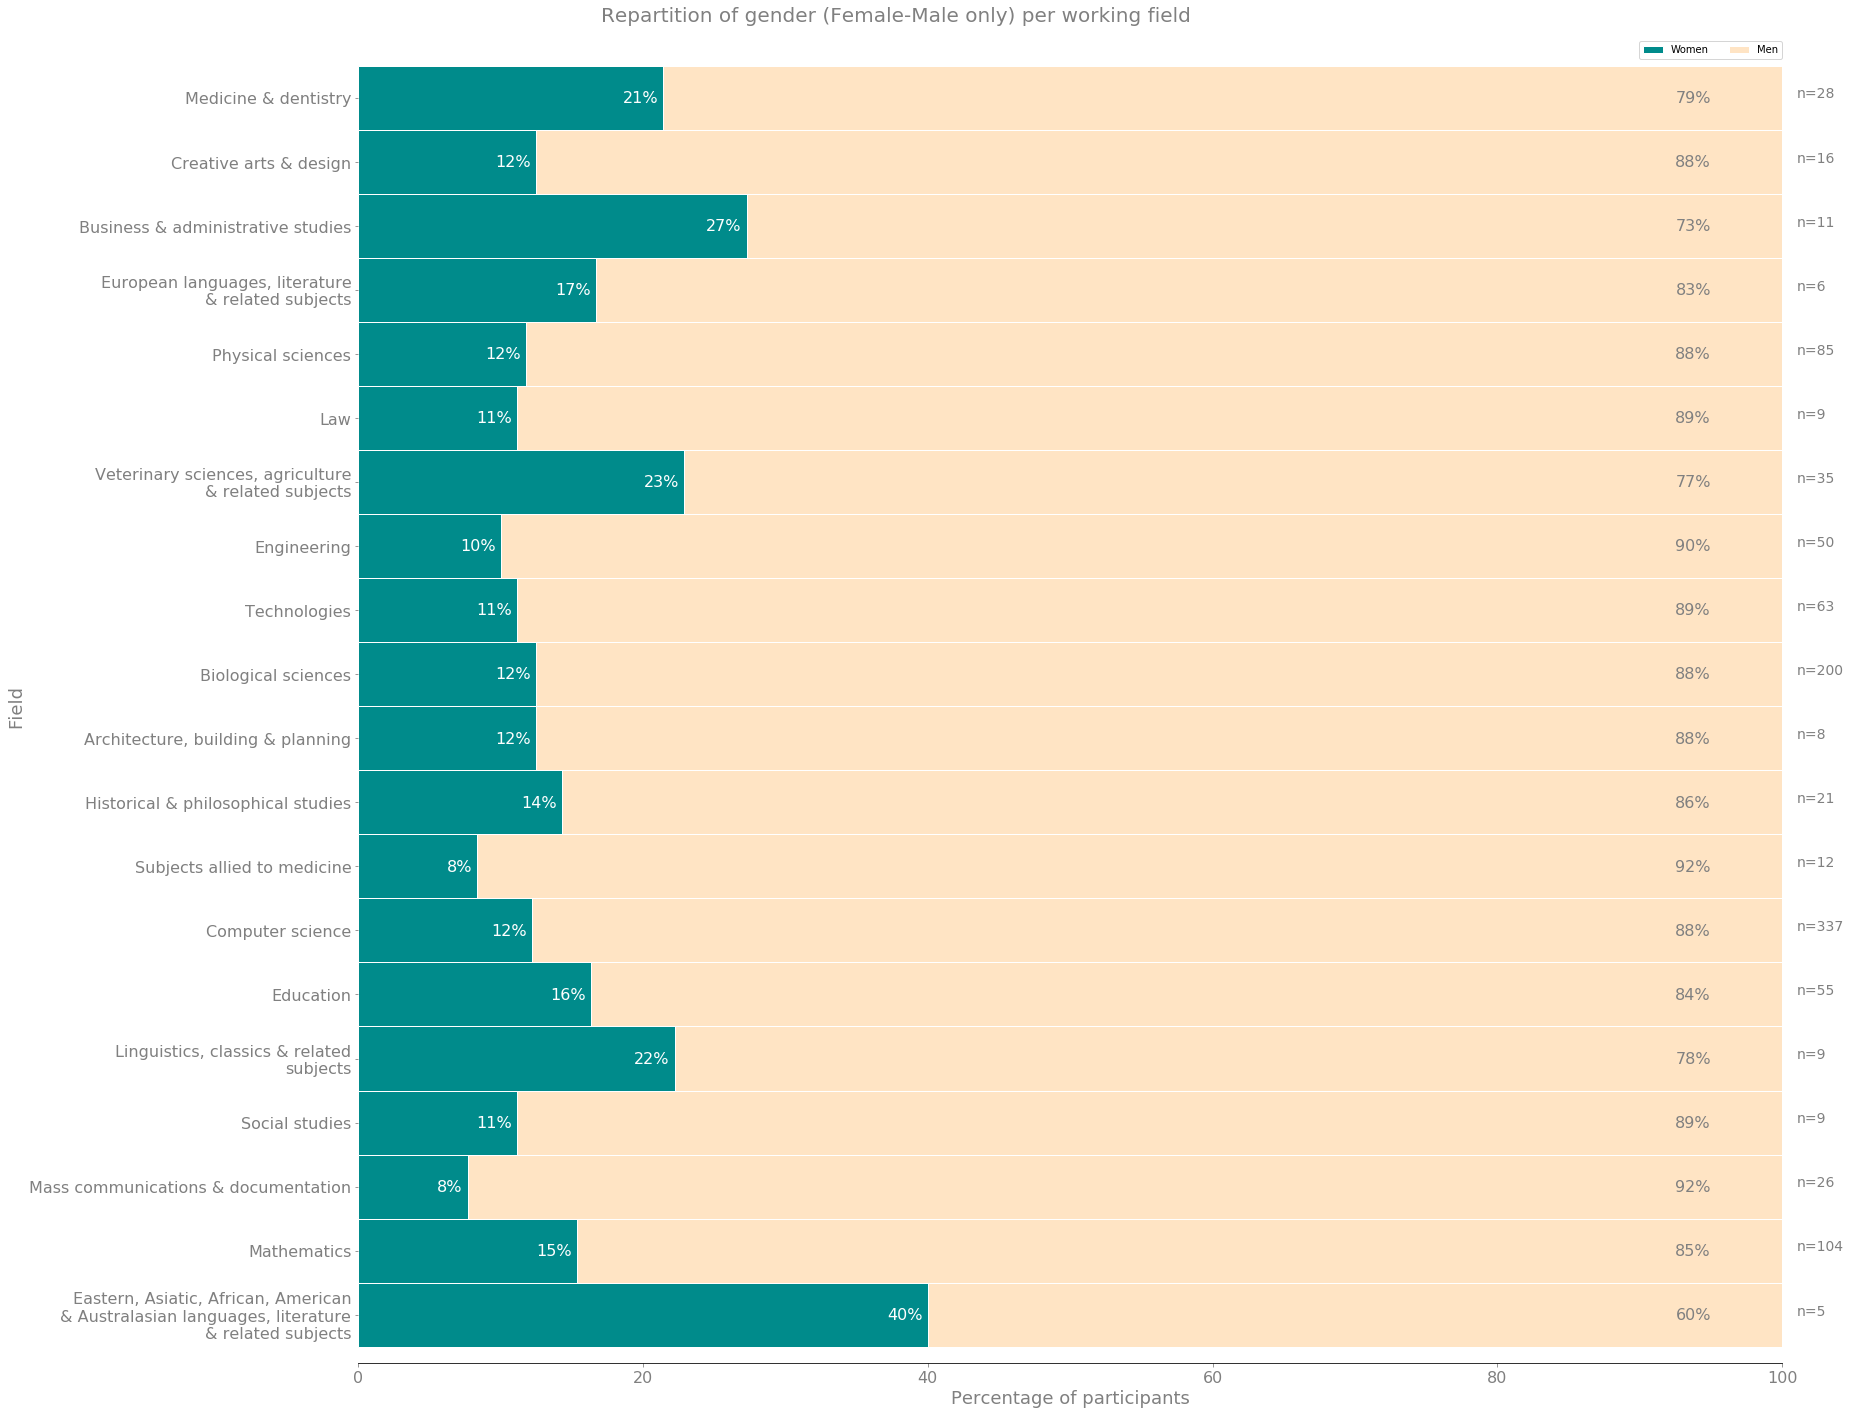

In [37]:
plot_bar_gender(gender_per_working_field_perc, title='Repartition of gender (Female-Male only) per working field', x_title = 'Field', y_title = 'Percentage of participants', name_save='working_field', n_values=n_values_working);

## Years of software development between gender

### Setting up

In [38]:
start_contract = 'currentEmp9. When did you start your current position?'
year_dev = 'soft1can. How many years of software development experience do you have?'
prev_work = ['prevEmp1. Where was your previous job based?']

# Transform into datetime object
df[start_contract] = pd.to_datetime(df[start_contract], format= '%Y-%m-%d %H:%M:%S')

In [39]:
# Getting the number of year as RSE since the start of the contract and the 1st of January 2019
def numb_year(x):
    return (datetime.datetime(2019, 1, 1) - x).days/365

df['Number of year RSE'] = df[start_contract].apply(numb_year)

### Number of year of software development 

In [40]:
df.groupby('Gender')[year_dev].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,109.0,10.442661,9.321522,0.0,4.0,7.0,15.00,44.0
Male,700.0,13.084000,9.491288,0.0,6.0,10.0,19.25,50.0


### Number of year of development prior to RSE job

In [41]:
# Calculating the number of year of development prior of the job as RSE
df['Numb_year_prog_before_rse'] = df[year_dev] - df['Number of year RSE']

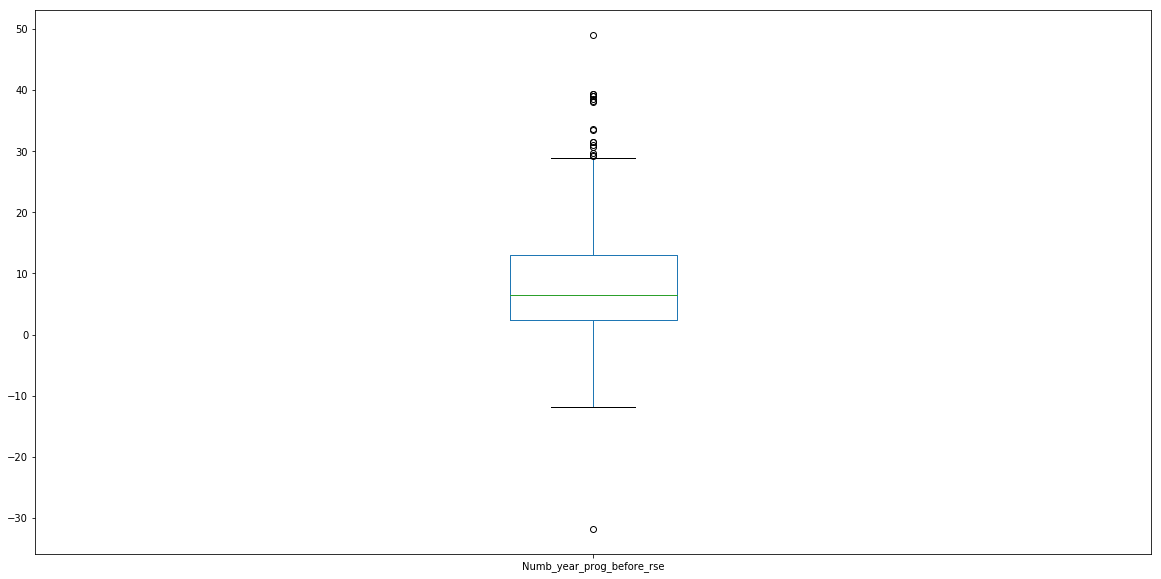

In [42]:
df['Numb_year_prog_before_rse'].plot(kind='box', legend=True)

In [43]:
# Getting ride of all outliers that have more than 30 years of coding experience (in top of their RSE experience)
#df['Numb_year_prog_before_rse'] = np.where(df['Numb_year_prog_before_rse'] >= 30, np.nan, df['Numb_year_prog_before_rse'] )
#df['Numb_year_prog_before_rse'] = np.where(df['Numb_year_prog_before_rse'] < -30, np.nan, df['Numb_year_prog_before_rse'] )

In [44]:
describe_year_prog_before_rse = df.groupby('Gender')['Numb_year_prog_before_rse'].describe().reset_index()
describe_year_prog_before_rse.to_csv('./gender_difference/data/describe_year_prog_before_rse.csv', index=True)
describe_year_prog_before_rse

,Gender,count,mean,std,min,25%,50%,75%,max
0,Female,96.0,6.534297,7.840221,-11.923288,1.35137,4.042466,10.693151,38.997260
1,Male,632.0,8.549606,8.323188,-31.838356,2.49589,6.746575,13.127397,49.010959


In [45]:
women_dev_year = df[df['Gender'] == 'Female']['Numb_year_prog_before_rse'].dropna()
men_dev_year = df[df['Gender'] == 'Male']['Numb_year_prog_before_rse'].dropna()

# Using Whelsh test 
ttest_ind(women_dev_year, men_dev_year, equal_var=False)

Ttest_indResult(statistic=-2.3272090670374754, pvalue=0.021502854292190964)

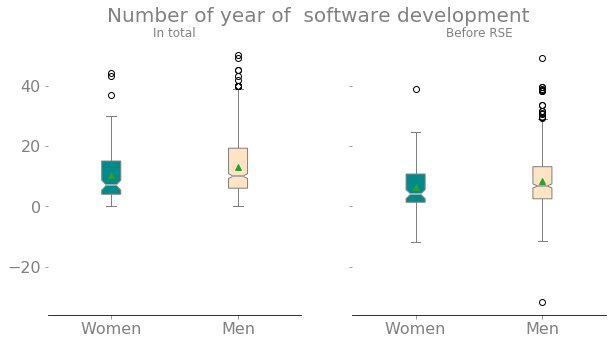

In [46]:
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharex=True, sharey=True)
boxplot(df,'Numb_year_prog_before_rse', 'Gender', 'Before RSE', axes[1])
boxplot(df, year_dev, 'Gender', 'In total', axes[0])
plt.suptitle('Number of year of  software development', fontsize=20, color='grey')
plt.savefig('./gender_difference/plots/gender_year_soft_dev.png', bbox_inches='tight');

### Checking of no prior dev experience


In [47]:
df['Prior Dev'] = np.where(df['Numb_year_prog_before_rse'] <=0, 'No', 'Yes')

In [48]:
leading_table = pd.crosstab(df['Gender'], df['Prior Dev'])
leading_table
leading_table.to_csv('./gender_difference/data/contingency_table_prior_experience.csv', index=True)

Prior Dev,No,Yes
Gender,,
Female,16,93
Male,58,642


In [49]:
leading_table_perc = pd.crosstab(df['Gender'], df['Prior Dev'],normalize='index')
leading_table_perc

Prior Dev,No,Yes
Gender,,
Female,0.146789,0.853211
Male,0.082857,0.917143


In [50]:
chi2_test(leading_table)

stat= 3.901214306618117
dof=1
[[  9.97033375  99.02966625]
 [ 64.02966625 635.97033375]]
probability=0.950, critical=3.841, stat=3.901
Dependent (reject H0)
significance=0.050, p=0.048
Dependent (reject H0)


## Evolution of the proportion of women hired over time

In [110]:
df['Year hired'] = pd.DatetimeIndex(df[start_contract]).year
#df['Year hired'] = pd.to_datetime(df['Year hired'], format= '%Y')
year_gender = df.groupby('Gender')['Year hired'].value_counts().reset_index(name='count')
#year_gender = year_gender.dropna(how='any', axis=1)
year_gender['Year hired'] = year_gender['Year hired'].astype(int)#.str.replace('.0', '')

In [111]:
year_gender = year_gender.pivot(index='Year hired', columns='Gender', values='count').reset_index()
year_gender = year_gender.fillna(0)

In [121]:
year_gender['Total'] = year_gender.loc[:,'Female'].add(year_gender.loc[:,'Male'], fill_value=0)
year_gender['Proportion women hired'] = year_gender.loc[:, 'Female'] / year_gender.loc[:, 'Total']*100
year_gender

Gender,Year hired,Female,Male,Total,Proportion women hired
0,1984,1.0,0.0,1.0,100.000000
1,1985,0.0,1.0,1.0,0.000000
2,1987,0.0,2.0,2.0,0.000000
3,1988,0.0,1.0,1.0,0.000000
4,1989,0.0,2.0,2.0,0.000000
5,1990,0.0,3.0,3.0,0.000000
6,1992,1.0,5.0,6.0,16.666667
7,1993,0.0,3.0,3.0,0.000000
8,1994,0.0,1.0,1.0,0.000000
9,1995,0.0,2.0,2.0,0.000000


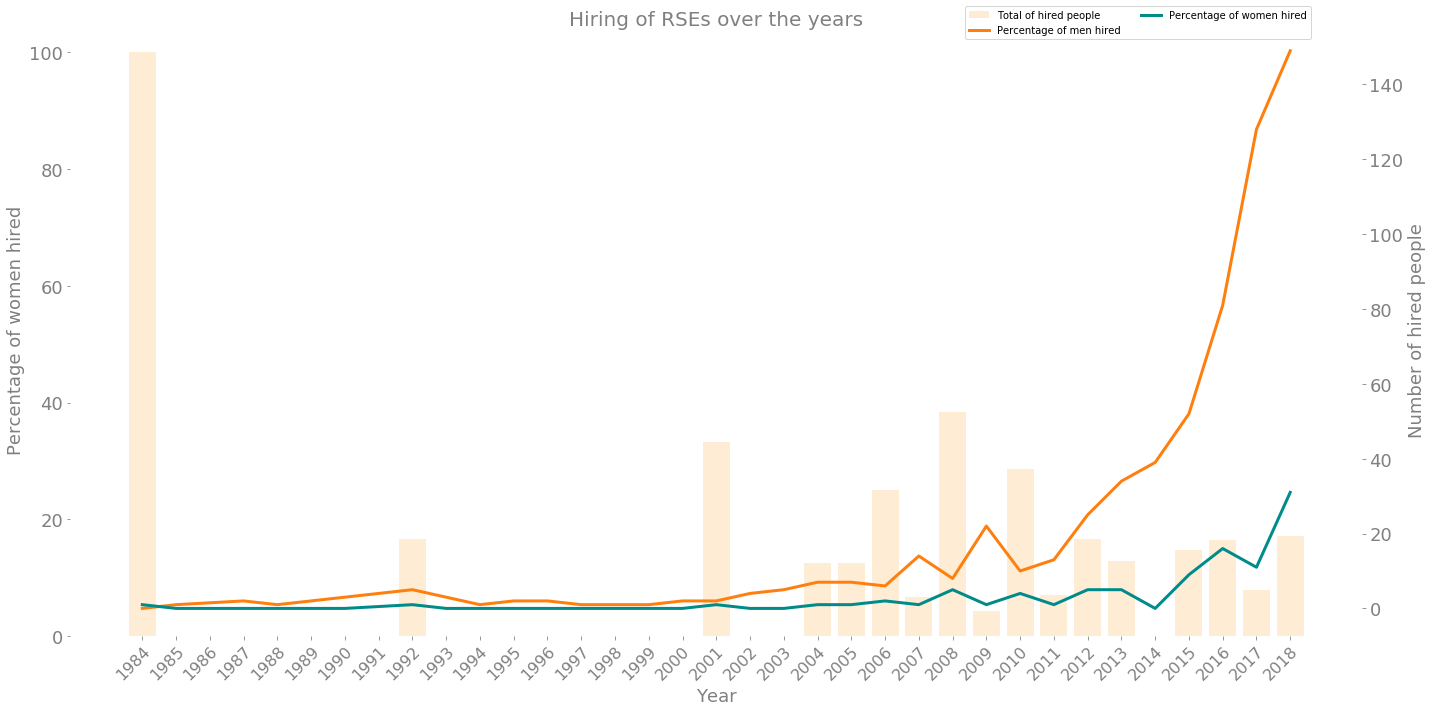

In [132]:
x = year_gender['Year hired']
y1 = year_gender['Proportion women hired']
y2 = year_gender['Total']
y3 = year_gender['Male']
y4 = year_gender['Female']
fig, ax1 = plt.subplots(sharex=True)

ax2 = ax1.twinx()
#ax1.fill_between(x, y2, alpha=0.7, color='bisque', label='Total of hired people')

ax1.bar(x, y1, alpha=0.7, color='bisque', label='Total of hired people')


#ax1.yaxis.tick_right()
#ax1.yaxis.set_label_position("right")
#ax2.yaxis.tick_left()
#ax2.yaxis.set_label_position("left")
bspl = splrep(x,y1,s=5)
bspl_y = splev(x,bspl)
#ax2.plot(x, bspl_y, 'darkcyan', label='Percentage of women hired')


ax2.plot(x, y3, 'tab:orange', label='Percentage of men hired', linewidth=3)
ax2.plot(x, y4, 'darkcyan', label='Percentage of women hired', linewidth=3)


ax1.set_xlabel('Year', fontsize=18, color='grey')
ax2.set_ylabel(ylabel='Number of hired people',fontsize=18, color='grey')
ax1.set_ylabel(ylabel='Percentage of women hired', fontsize=18, color='grey')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)


ax1.tick_params(axis='y', colors='grey', labelsize=18)
ax2.tick_params(axis='y', colors='grey', labelsize=18)

# manuall set up start and end because data has years not useful
#start, end = ax1.get_xlim()
start, end = 1984, 2019

ax1.xaxis.set_ticks(np.arange(int(start), int(end), 1))
ax1.tick_params(axis='x', colors='grey', labelsize=16)
labels = [str(x) for x in np.arange(int(start), int(end), 1)]
ax1.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')

#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax2.get_yticks())))
plt.suptitle('Hiring of RSEs over the years', fontsize=20, color='grey')
h1,l1 = ax1.get_legend_handles_labels()
h2,l2 = ax2.get_legend_handles_labels()
handles = h1 + h2
labels = l1 + l2

plt.legend(handles, labels, bbox_to_anchor=(0., 1, 0.96, .0), loc=5,
           ncol=2,  borderaxespad=0.)
#plt.margins(x=0, y=0.01)
plt.tight_layout()
#plt.subplots_adjust(top=0.95)
plt.savefig('./gender_difference/plots/gender_per_year.png')
plt.show();

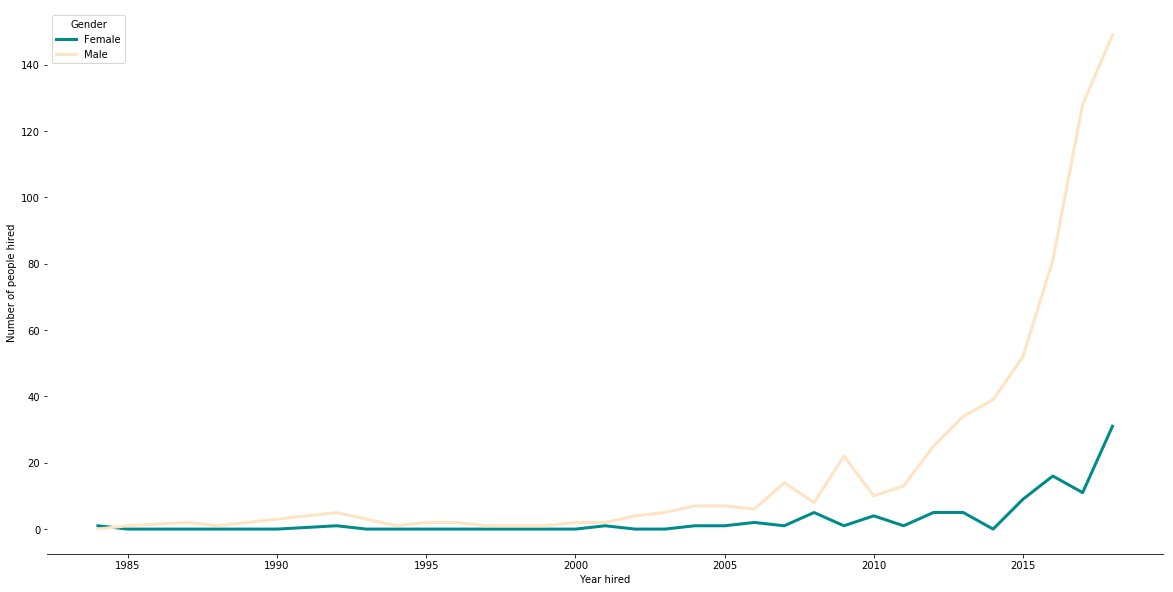

In [119]:
#year_gender = year_gender.drop(, axis=1)
plot = year_gender.plot(kind='line', 
                      x='Year hired', 
                      label=[x for x in year_gender.columns if x not in ['Proportion women hired', 'Total']],
                      color=['darkcyan', 'bisque'],
                      linewidth=3
)
#plot.set_xticks(range(len(year_gender['Year hired'])))
#plot.set_xticklabels(df_job_per_month['date'], rotation=90)
ax = plot.set_ylabel("Number of people hired")
ax = plot.spines['top'].set_visible(False)
ax = plot.spines['right'].set_visible(False)
ax = plot.spines['left'].set_visible(False)